# IMPORTING ALL USEFUL LIBRARIES

# LOADING DATASET USED

In [29]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Import SVC
from sklearn.svm import SVC

# Import Naive bayes
from sklearn.naive_bayes import MultinomialNB

# Import SGD Classifier
from sklearn.linear_model import SGDClassifier

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Import QDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

# Import train_test_split function
from sklearn.model_selection import train_test_split, GridSearchCV 

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics 

#Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#Import classification_report
from sklearn.metrics import classification_report

from sklearn_evaluation.plot import confusion_matrix

In [30]:
# load dataset
data = pd.read_csv("data.csv")
data.head()

,ID Number,Case,Section (IPC),Judgment Date,Chapter
0,1,The deceased in her statement stated that the ...,302,14-Mar-19,Sixteen
1,2,additionally respondent Makrand Singh for caus...,302,14-Jan-19,Sixteen
2,3,"Ms. Kailashi was\nreturning from the farm, in ...",304,10-Apr-19,Sixteen
3,4,"When they reached near Advocate Mishra’s lane,...",294,19-Feb-19,Fourteen
4,5,It was stated that seven named persons includi...,452,11-Apr-19,Seventeen


In [31]:
# unique category labels
data['Chapter'].unique() 

array(['Sixteen', 'Fourteen', 'Seventeen', 'Twenty', 'Eight', 'Four',
       'Ten', 'Nine', 'Eleven', 'Five', 'Fifteen'], dtype=object)

# REPRESENTING FREQUENCY OF CHAPTERS

(-1.1142375321128322,
 1.1006779792841213,
 -1.105451164586582,
 1.1088341058560176)

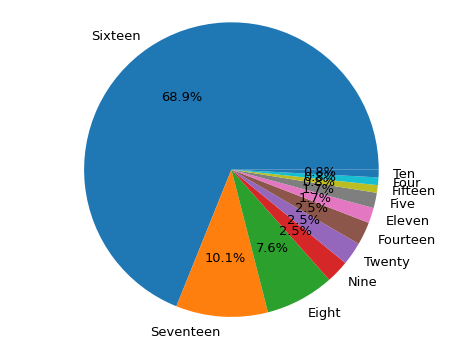

In [32]:
data.Chapter.value_counts().plot(kind='pie', 
                                  figsize=(8,6), 
                                  fontsize=13, 
                                  autopct='%1.1f%%', 
                                  wedgeprops={'linewidth': 5}
                                  )
plt.axis('off')
plt.axis('equal')

In [33]:
#Lower Case and removing all puntuation marks from the "Case"
data['Case'] = data['Case'].str.replace('[^\w\s]','').str.lower() 

<ipython-input-33-f961c9767309>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Case'] = data['Case'].str.replace('[^\w\s]','').str.lower()


# CREATING DATAFRAME FOR EACH CHAPTER

In [34]:
# create dataframe for each Chapter
IPC_14 = data.loc[data['Chapter'] == 'Fourteen'] 
IPC_16 = data.loc[data['Chapter'] == 'Sixteen'] 
IPC_17 = data.loc[data['Chapter'] == 'Seventeen'] 
IPC_20 = data.loc[data['Chapter'] == 'Twenty'] 
IPC_8 = data.loc[data['Chapter'] == 'Eight'] 
IPC_4 = data.loc[data['Chapter'] == 'Four'] 
IPC_10 = data.loc[data['Chapter'] == 'Ten'] 
IPC_9 = data.loc[data['Chapter'] == 'Nine'] 
IPC_5 = data.loc[data['Chapter'] == 'Five'] 
IPC_11 = data.loc[data['Chapter'] == 'Eleven'] 
IPC_15 = data.loc[data['Chapter'] == 'Fifteen'] 
 
Case_14 = IPC_14['Case'].to_string()
Case_16 = IPC_16['Case'].to_string()
Case_17 = IPC_17['Case'].to_string()
Case_20 = IPC_20['Case'].to_string()
Case_8 = IPC_8['Case'].to_string()
Case_4 = IPC_4['Case'].to_string()
Case_10 = IPC_10['Case'].to_string()
Case_9 = IPC_9['Case'].to_string()
Case_5 = IPC_5['Case'].to_string()
Case_11 = IPC_11['Case'].to_string()
Case_15 = IPC_15['Case'].to_string()

# 1. NAVE BAYES

In [35]:
# convert data to vectors
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['Case'])

y = data['Chapter']

#I will split data 60%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5) 

# fit and score the bayesian classifier
mnb = MultinomialNB(alpha=1)


mnb.fit(X_train, y_train)

y_pred = mnb.predict(X_test)


print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

       Eight       0.00      0.00      0.00         6
      Eleven       0.00      0.00      0.00         0
     Fifteen       0.00      0.00      0.00         1
        Five       0.00      0.00      0.00         2
        Four       0.00      0.00      0.00         1
    Fourteen       0.00      0.00      0.00         2
        Nine       0.00      0.00      0.00         2
   Seventeen       0.10      0.17      0.12         6
     Sixteen       0.74      0.86      0.80        37
         Ten       0.00      0.00      0.00         0
      Twenty       0.00      0.00      0.00         3

    accuracy                           0.55        60
   macro avg       0.08      0.09      0.08        60
weighted avg       0.47      0.55      0.51        60

Accuracy: 0.55


C:\Users\jain\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jain\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jain\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jain\anaconda3\lib\site-packages\sklearn\metrics\_classif

# CONFUSION MATRIX

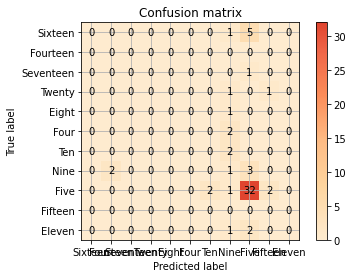

In [36]:
#Confusion Matrix
confusion_matrix(y_test, mnb.predict(X_test), target_names =
        ['Sixteen', 'Fourteen', 'Seventeen', 'Twenty', 'Eight', 'Four', 'Ten', 'Nine', 'Five', 'Fifteen', 'Eleven']).grid(True)

#  SGD CLASSIFIER

In [17]:
# Now I am gone use SGD Classifier 
sgd = SGDClassifier(n_jobs=-1, n_iter=10, random_state=1234)

# hyperparameters for tuning
sgd_grid = [{'loss': ['hinge', 'log', 'squared_hinge'],
             'alpha': [0.0001, 0.0001, 0.00001]}]

# grid search with cross validation
sgd_search = GridSearchCV(estimator=sgd, param_grid=sgd_grid, cv=3, refit=True)
sgd_search.fit(X_train, y_train)
y_pred = mnb.predict(X_test)


print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

TypeError: __init__() got an unexpected keyword argument 'n_iter'

# 3. DECISION TREE CLASSIFIER

In [37]:
# convert data to vectors
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['Case'])
y = data['Chapter']

#I will split data 60%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5) 

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

       Eight       0.00      0.00      0.00         4
      Eleven       0.00      0.00      0.00         1
        Five       0.00      0.00      0.00         1
    Fourteen       0.00      0.00      0.00         1
        Nine       0.00      0.00      0.00         1
   Seventeen       0.00      0.00      0.00         6
     Sixteen       0.72      0.95      0.82        44
      Twenty       0.00      0.00      0.00         2

    accuracy                           0.70        60
   macro avg       0.09      0.12      0.10        60
weighted avg       0.53      0.70      0.60        60

Accuracy: 0.7


C:\Users\jain\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jain\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jain\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 4. SUPPORT VECTOR MACHINE

In [38]:
# convert data to vectors
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['Case'])
y = data['Chapter']

#I will split data 60%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5) 

# Create SVC object
svc=SVC(kernel='linear')

# SVC Classifer
svc.fit(X_train,y_train)


#Predict the response for test dataset
y_pred=svc.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

       Eight       0.00      0.00      0.00         3
      Eleven       0.00      0.00      0.00         2
    Fourteen       0.00      0.00      0.00         1
        Nine       0.00      0.00      0.00         1
   Seventeen       0.00      0.00      0.00         9
     Sixteen       0.66      0.97      0.79        40
         Ten       0.00      0.00      0.00         1
      Twenty       0.00      0.00      0.00         3

    accuracy                           0.65        60
   macro avg       0.08      0.12      0.10        60
weighted avg       0.44      0.65      0.53        60

Accuracy: 0.65


C:\Users\jain\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jain\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jain\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 5. Random Forest Classifier

In [39]:
# convert data to vectors
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['Case'])
y = data['Chapter']

#I will split data 60%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5) 

# Create Random Forest Classifier object
clf=RandomForestClassifier(n_estimators=100)

# Train Random Forest Classifier
clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred=clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

       Eight       0.00      0.00      0.00         1
      Eleven       0.00      0.00      0.00         1
     Fifteen       0.00      0.00      0.00         1
        Five       0.00      0.00      0.00         1
    Fourteen       0.00      0.00      0.00         2
        Nine       0.00      0.00      0.00         2
   Seventeen       0.00      0.00      0.00         6
     Sixteen       0.75      0.98      0.85        45
         Ten       0.00      0.00      0.00         1
      Twenty       0.00      0.00      0.00         0

    accuracy                           0.73        60
   macro avg       0.07      0.10      0.08        60
weighted avg       0.56      0.73      0.63        60

Accuracy: 0.7333333333333333


C:\Users\jain\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jain\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jain\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jain\anaconda3\lib\site-packages\sklearn\metrics\_classif

# 6. K NEIGHBORS CLASSIFIER

In [40]:
# convert data to vectors
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['Case'])
y = data['Chapter']

#I will split data 60%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5) 

# Create K Neighbors Classifier object
classifier = KNeighborsClassifier(n_neighbors=5)

# Train K Neighbors Classifer
classifier = classifier.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = classifier.predict(X_test)

# Model Accuracy, how often is the classifier correct?

print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

       Eight       0.00      0.00      0.00         7
      Eleven       0.00      0.00      0.00         1
        Five       0.00      0.00      0.00         1
    Fourteen       0.00      0.00      0.00         1
   Seventeen       0.00      0.00      0.00         3
     Sixteen       0.75      1.00      0.86        45
      Twenty       0.00      0.00      0.00         2

    accuracy                           0.75        60
   macro avg       0.11      0.14      0.12        60
weighted avg       0.56      0.75      0.64        60

Accuracy: 0.75


C:\Users\jain\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jain\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jain\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 7. LOGISTIC REGRESSION

In [43]:
# convert data to vectors
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['Case'])
y = data['Chapter']

#I will split data 60%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5) 

# Create Logistic Regression Classifier object
logreg = LogisticRegression()

# Train Logistic Regression Classifer
logreg.fit(X_train,y_train)

#Predict the response for test dataset
y_pred=logreg.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

       Eight       0.00      0.00      0.00         6
     Fifteen       0.00      0.00      0.00         1
        Five       0.00      0.00      0.00         2
        Nine       0.00      0.00      0.00         1
   Seventeen       0.00      0.00      0.00         6
     Sixteen       0.69      0.98      0.81        42
         Ten       0.00      0.00      0.00         1
      Twenty       0.00      0.00      0.00         1

    accuracy                           0.68        60
   macro avg       0.09      0.12      0.10        60
weighted avg       0.49      0.68      0.57        60

Accuracy: 0.6833333333333333


C:\Users\jain\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jain\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jain\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# CASE CHAPTER FUNCTION

In [42]:
# Case Chapter function
def Case1(Case2):
    Chapter = {'Fourteen' : 'This case is comes under the 14th Chapter Of IPC', 
                  'Eleven' : 'This case is comes under the 11th Chapter of IPC', 
                  'Sixteen' : 'This case comes under the 16th Chapter of IPC',
                  'Seventeen' : 'This case is comes under the 17th Chapter of IPC', 
                  'Twenty' : 'This case comes under the 20th Chapter of IPC', 
                   'Five' : 'This case is comes underr the 5th Chapter of IPC', 
                  'Four' : 'This case comes under the 4th Chapter of IPC', 
                   'Eight' : 'This case is comes underr the 8th Chapter of IPC', 
                  'Ten' : 'This case comes under the 10th Chapter of IPC', 
                   'Nine' : 'This case is comes underr the 9th Chapter of IPC', 
                  'Fifteen' : 'This case comes under the 15th Chapter of IPC'}
               
    pridicter = sgd_search.best_estimator_.predict(vectorizer.transform([Case2]))
    return Chapter[pridicter[0]]

In [25]:
Case1("additionally respondent Makrand Singh for causing the death of three people, viz. Premchand Jain, his wife Anandi Devi and unmarried daughter Preeti, and for committing robbery of Rs. 30,000/in cash and about Rs. 8,00,000/worth of gold and silver.")

NameError: name 'sgd_search' is not defined